In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import glob

LOGs = './log/*'
dfs = []

for file in glob.glob(LOGs):
    print(file)
    df = pd.read_csv(file)
    strategy = file[file.find('hist_')+5:file.find('_',file.find('hist_')+5)]
    alpha = file[file.find('alpha_')+6:file.find('_',file.find('alpha_')+6)]
    k_vizinhos = file[file.find('k_')+2:file.find('_',file.find('k')+2)]
    iterations = file[file.find('i_')+2:file.find('_',file.find('i_')+2)]
    df['strategy'] = strategy
    df['alpha'] = alpha
    df['k_vizinhos'] = k_vizinhos
    df['iterations'] = iterations

    dfs.append(df)

all_data = pd.concat(dfs, ignore_index=False).reset_index(drop=False)
all_data.rename({'index': 'iteration'}, axis=1, inplace=True)

./log\busca_local_hist_best_alpha_0.01_k_100_i_100_.csv
./log\busca_local_hist_best_alpha_0.01_k_10_i_1000_.csv
./log\busca_local_hist_best_alpha_0.01_k_10_i_100_.csv
./log\busca_local_hist_best_alpha_0.01_k_30_i_1000_.csv
./log\busca_local_hist_best_alpha_0.01_k_30_i_100_.csv
./log\busca_local_hist_best_alpha_0.02_k_100_i_100_.csv
./log\busca_local_hist_best_alpha_0.02_k_10_i_1000_.csv
./log\busca_local_hist_best_alpha_0.02_k_10_i_100_.csv
./log\busca_local_hist_best_alpha_0.02_k_30_i_1000_.csv
./log\busca_local_hist_best_alpha_0.02_k_30_i_100_.csv
./log\busca_local_hist_best_alpha_0.03_k_100_i_1000_.csv
./log\busca_local_hist_best_alpha_0.03_k_100_i_100_.csv
./log\busca_local_hist_best_alpha_0.03_k_10_i_1000_.csv
./log\busca_local_hist_best_alpha_0.03_k_10_i_100_.csv
./log\busca_local_hist_best_alpha_0.03_k_30_i_1000_.csv
./log\busca_local_hist_best_alpha_0.03_k_30_i_100_.csv
./log\busca_local_hist_first_alpha_0.01_k_100_i_100_.csv
./log\busca_local_hist_first_alpha_0.01_k_10_i_1000_

In [2]:
# sns.set(style="ticks", context="notebook")
# plt.style.use("dark_background")

In [3]:
all_data.head()

,iteration,pts,improve,qtd_vizinhos_validos,tempo_execucao,strategy,alpha,k_vizinhos,iterations
0,0,931.15,True,100,16.26,best,0.01,100,100
1,1,936.15,True,100,15.62,best,0.01,100,100
2,2,937.30,True,94,14.43,best,0.01,100,100
3,3,937.45,True,65,9.83,best,0.01,100,100
4,4,939.10,True,54,8.17,best,0.01,100,100


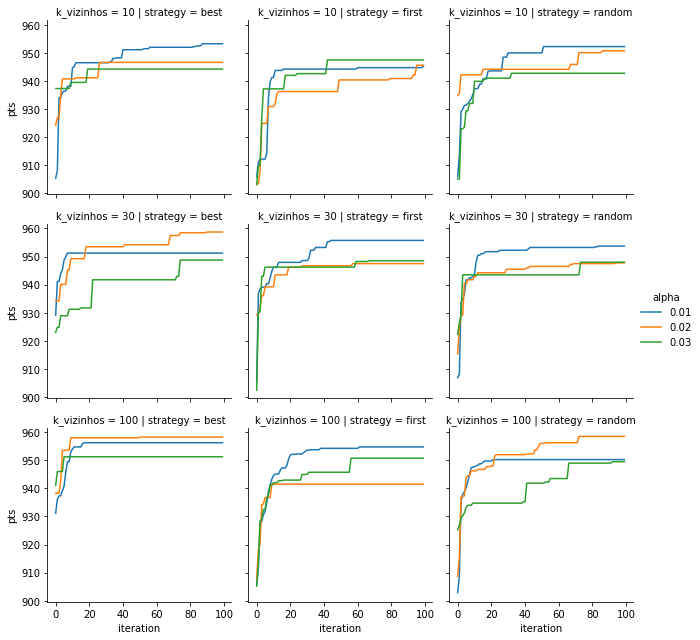

In [4]:
g = sns.FacetGrid(
    data=all_data[all_data.iterations=='100'], row='k_vizinhos', col='strategy', hue='alpha',
    row_order=['10', '30', '100'], col_order=['best', 'first', 'random'])
g.map(sns.lineplot, 'iteration', 'pts')
g.add_legend()
g=g

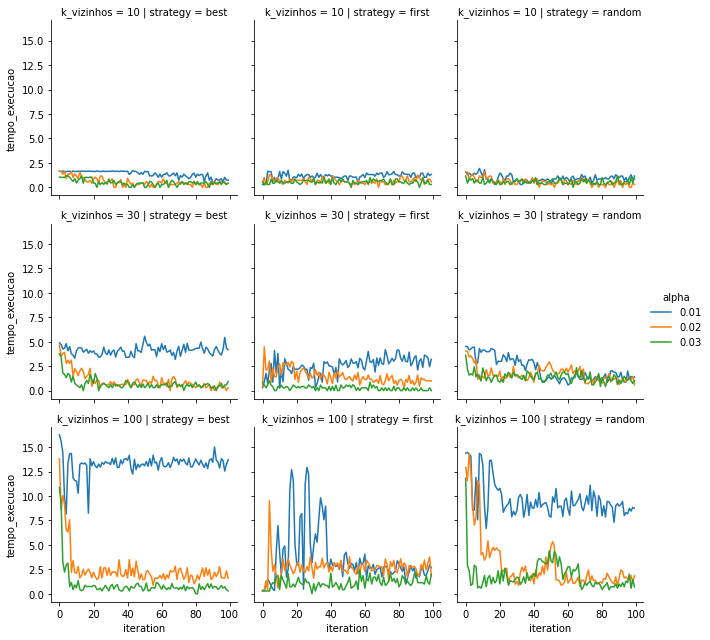

In [5]:
g = sns.FacetGrid(
    data=all_data[all_data.iterations=='100'], row='k_vizinhos', col='strategy', hue='alpha',
    row_order=['10', '30', '100'], col_order=['best', 'first', 'random'])
g.map(sns.lineplot, 'iteration', 'tempo_execucao')
g.add_legend()
g=g